{{badge}}

There are total 7 types of methods we'll discuss in this post:
* Label Encoding
* OneHot Encoding
* Feature Hashing
* Encoding categories with dataset statistics
* Encoding cyclic featues
* Target Encoding
* K-Fold target Encoding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import base
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import OneHotEncoder
from zipfile import ZipFile

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import getpass as gt

user = input('Provide Kaggle Username : ')
api = gt.getpass('API key for '+ user +' :')
print('')


!mkdir ~/.kaggle

!touch /root/.kaggle/kaggle.json

!chmod 600 /root/.kaggle/kaggle.json

kaggle_api_key = {'username':user, 'key':api}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(kaggle_api_key,file)

!kaggle datasets download -d vinodkumar9576/categorical-feature-encoding-challenge

import pandas as pd
from zipfile import ZipFile

print('Files in the downloaded zip file :')
print('-'*50)
for name in ZipFile('/content/categorical-feature-encoding-challenge.zip').namelist():
  print(name)

with ZipFile('/content/categorical-feature-encoding-challenge.zip') as zp:
  train_df = pd.read_csv(zp.open('train.csv'))
  test_df = pd.read_csv(zp.open('test.csv'))

 80% 17.0M/21.2M [00:00<00:00, 20.5MB/s]
100% 21.2M/21.2M [00:00<00:00, 31.1MB/s]
Files in the downloaded zip file :
--------------------------------------------------
sample_submission.csv
test.csv
train.csv


In [ ]:
with ZipFile('/content/categorical-feature-encoding-challenge.zip') as zp:
  train_df = pd.read_csv(zp.open('train.csv'))
  test_df = pd.read_csv(zp.open('test.csv'))

In [ ]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,f12246592,50d7ad46a,ec69236eb,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,5b0f5acd5,1fe17a1fd,04ddac2be,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [ ]:
print('train data has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))
print('test data has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

train data has 300000 rows and 25 columns
test data has 200000 rows and 24 columns


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  object
 5   bin_4   300000 non-null  object
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  int64 
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

**<h3>Defining the train and target**

In [ ]:
X = train_df.drop(['target'], axis = 1)
y = train_df['target']

**<h3>Plotting the distribution of target variable**

In [ ]:
x = y.value_counts()

fig = go.Figure(data=[go.Bar(x= x.index, y = x, marker = dict(color =['#1f77b4', '#ff7f0e']))])

fig.update_layout(
    title_text = 'Distribution of target variable',
    title_x = 0.5,
    autosize = False,
    height = 500,
    width = 600
)
fig.update_xaxes(tickvals=[0,1], ticktext=[0,1], tickmode = 'array', title_text = 'target', title_standoff = 3)
fig.show()

**<h4>Types of data available in the given data set**

* **Binary data** : column contains only  values i.e. `0/1`.
* **Categorical data** : column that has limited number of values. Eg: day of week.
* **Ordinal data** : It is a type of categorical variable which values has some order associated with it.
* **Nominal data** : Column contains data that has no numerical importance such as `occupation, person` name etc.
* **Timeseries data** : Time series data has a temporal value attached to it. Data would be like a date or time stamp that you can look trends in time.

**<h2>Logistic Regression**

In [ ]:
def logistic(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.2)
  lr = LogisticRegression()
  lr.fit(X_train, y_train)
  y_pre = lr.predict(X_test)

  print('Accuracy : ', accuracy_score(y_test, y_pre))

#1. Label encoding

* In this method, we change every categorical data to a number.
* That is each type will be replaced by number.
* Eg: 1 - Grandmaster, 2 - Master, 3 - Expert
* Steps to implement :
  * Initialize labelencoder class
  * Call the fit() method to fit the data
  * Transform data to labelencoded data
* Unknowingly we are making the columns as ordinal features that has no relation at all.
* This is irrelevant but does the work somehow.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#we are goning to encode all columns of 'object' datatype
%%time

train = pd.DataFrame()
label = LabelEncoder()

for c in X.columns:
  if(X[c].dtype == 'object'):
    train[c] = label.fit_transform(X[c])
  else:
    train[c] = X[c]

CPU times: user 1.13 s, sys: 30.7 ms, total: 1.16 s
Wall time: 1.16 s


In [ ]:
train.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,0,78,120,491,1686,2175,1,2,1,7,3,136,1,1
1,1,0,1,0,1,1,1,4,3,5,2,159,510,260,650,11635,0,2,3,0,0,93,6,7
2,2,0,0,0,0,1,0,4,4,5,3,44,14,766,1932,8078,0,1,4,7,17,31,6,1
3,3,0,1,0,0,1,2,4,5,0,1,209,165,1121,629,6056,0,2,0,8,3,134,1,0
4,4,0,0,0,0,0,2,4,4,0,1,90,61,34,1760,8231,0,2,2,0,17,158,6,7


* We'll check whether any columns got changed.

In [ ]:
print('test data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))

test data has 300000 rows and 24 columns


In [ ]:
logistic(train,y)

Accuracy :  0.6917833333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#2. One hot Encoding

* In this method,  we encode each category as a one hot encoding (OHE) vector or dummy variables.
* OHE takes each category value and turns it into a binary vector of size |i|(number of vaules in category i) where all columns are equal to zero besides the category column.

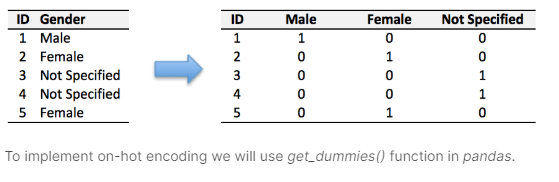

* To implement OHE, use get_dummies(), where in it produces output as a pandas dataframe.
* Other alternative is to use OneHotEncoder() from sklearn. This method produces a sparse matrix.
* Advantage of this method is that it uses very less memory/cpu resourses.
* Steps to implement:
  * Import OneHotEncoder from sklearn.preprocessing
  * Initialize the OneHotEncoder
  * Fit and then transform our data

In [ ]:
%%time

one = OneHotEncoder()

one.fit(X)

train = one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0], train.shape[1]))

train data set has got 300000 rows and 316461 columns
CPU times: user 1.72 s, sys: 54.3 ms, total: 1.77 s
Wall time: 1.78 s


In [ ]:
logistic(train,y)

Accuracy :  0.75715


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



* You can see the columns have enormously increased in onehot encoding.
* This is the catch in OHE and this is not useful in some applications.

#3. Feature hasing (aka the hashing trick)

* In this technique, categories are represented in OHE style as a sparse matrix but with much lower dimensions.
* We apply a hashing function to the category and then represent it by its indices.
* Eg: If we choose a dimension of 5 to represent 'New York' we calculate H(New York) mod 5 = 3 so 'New York' representation will be (0,0,1,0,0).

In [ ]:
from sklearn.feature_extraction import FeatureHasher

In [ ]:
%%time

X_train_hash = X.copy()

for c in X.columns:
  X_train_hash[c] = X[c].astype('str')

hashing = FeatureHasher(input_type = 'string')
hashing.fit(X)
train = hashing.transform(X_train_hash.values)

CPU times: user 4.76 s, sys: 70.2 ms, total: 4.83 s
Wall time: 4.84 s


In [ ]:
print('train data set has got {} rows and {} columns'.format(train.shape[0], train.shape[1]))

train data set has got 300000 rows and 1048576 columns


In [ ]:
logistic(train, y)

Accuracy :  0.7516833333333334


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#4. Encoding categories with dataset statistics

* In this method, a numeric representation for every category is given with a small number of columns but with an encoding that will put similar categories close to each other.
* Easiest way to implement above is to replace every category with the number of times that we saw it in the dataset.
* Example New York and New Jersey are both bi cities and they will probably both appear many times in our dataset.
* As they appear many times, their frequency can be relatively close to each other and model will know they are similar.

In [ ]:
%%time

X_train_stat = X.copy()

for c in X_train_stat.columns:
  if(X_train_stat[c].dtype == 'object'):
    #converting the data type of each column to category
    X_train_stat[c] = X_train_stat[c].astype('category')
    #assinging value counts (series)
    counts = X_train_stat[c].value_counts()
    #sorting the indices of series
    counts = counts.sort_index()
    #if there are any null categorical variables filling them with 0
    counts = counts.fillna(0)
    #we are adding each random number which is divided by 1000 to the frequency of each
    #category.. Donno exactly what this step is for, may be to separate if the frequency of cat var
    #is same for other var in other feature.
    counts += np.random.rand(len(counts))/1000
    #assiging each value to each cat var
    X_train_stat[c].cat.categories = counts

CPU times: user 676 ms, sys: 29.9 ms, total: 706 ms
Wall time: 723 ms


In [ ]:
X_train_stat.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,153535.000057,191633.00037,127341.000092,29855.000436,45979.000253,36942.000104,68448.000342,2594.000960,1148.000732,241.000690,271.000185,19.000571,2,77428.000432,33768.000561,24740.000064,3974.000103,506.000514,2,2,0
1,1,0,1,0,153535.000057,191633.00037,127341.000092,101181.000076,29487.000220,101123.000989,84517.000364,792.000090,842.000229,287.000375,111.000218,13.000638,1,77428.000432,22227.000962,35276.000344,18258.000582,2603.000841,7,8,0
2,2,0,0,0,146465.000748,191633.00037,96166.000653,101181.000076,101295.000724,101123.000989,54742.000926,2524.000237,1169.000109,475.000776,278.000230,29.000632,1,25065.000043,63908.000082,24740.000064,16927.000301,2572.000352,7,2,0


In [ ]:
print('train data set has got {} rows and {} columns'.format(X_train_stat.shape[0], X_train_stat.shape[1]))

train data set has got 300000 rows and 24 columns


* No new columns are added

In [ ]:
logistic(X_train_stat.drop('target', axis = 1), y)

Accuracy :  0.6946


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#5. Encoding cyclic Features

* Some features may have cyclic data like day, month etc.
* Common method for encoding cyclical data is to transform the data into two dimensions using a sine and cosine transformation.
* With this method we'll transform only features of cyclic data.
* If the month/day is in text format like 'January' or 'Monday' replace it with numbers and then proceed.

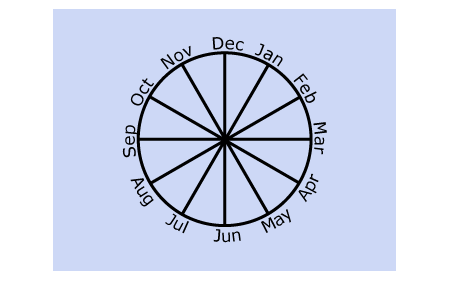

In [ ]:
%%time

X_train_cyclic = X.copy()

columns = ['day', 'month']

for col in columns:
  X_train_cyclic[col+'_sin'] = np.sin((2*np.pi*X_train_cyclic[col])/
                                      max(X_train_cyclic[col]))
  X_train_cyclic[col+'_cos'] = np.cos((2*np.pi*X_train_cyclic[col])/ max(X_train_cyclic[col]))

X_train_cyclic = X_train_cyclic.drop(columns, axis=1)

CPU times: user 291 ms, sys: 4.86 ms, total: 296 ms
Wall time: 300 ms


In [ ]:
X_train_cyclic.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day_sin,day_cos,month_sin,month_cos
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,50f116bcf,3ac1b8814,68f6ad3e9,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,9.749279e-01,-0.222521,0.866025,0.5
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,b3b4d25d0,fbcb50fc1,3b6dd5612,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,-2.449294e-16,1.000000,-0.866025,-0.5
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,3263bdce5,0922e3cb8,a6a36f527,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,-2.449294e-16,1.000000,0.866025,0.5


* Now we'll use OHE to encode other variables, then feed the data into the model.

In [ ]:
one = OneHotEncoder()

one.fit(X_train_cyclic)
train = one.transform(X_train_cyclic)

print('train data set has got {} rows and {} columns'.format(train.shape[0], train.shape[1]))


train data set has got 300000 rows and 316478 columns


* What we got is the sparse matrix as output.

In [ ]:
train

<300000x316478 sparse matrix of type '<class 'numpy.float64'>'
	with 7800000 stored elements in Compressed Sparse Row format>

* training the model

In [ ]:
logistic(train, y)

Accuracy :  0.758


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



#6. Target encoding

* In this method, we numerize categorical variables via target/output variable.
* We replace the categorical variable with just one new numerical variable and replace each category of the categirical variable with its corresponding probability of the target(if categorical) or mean of the target (if numerical).
* The main drawback of this method is its dependancy to the distribution of the target and its lower predictability power compare to the binary encoding method.
* Example:

Country|Target
:---:|:---:
India|1
China|0
India|0
China|1
India|1

* Encoding for India = $\frac{\#true\;targets\;under\;label\;india}{\#targets\;under\;the\;label\;india}=\frac{2}{3}=0.66$

Country|Target
:---:|:---:
India|0.66
China|0.5

* In the data set we replace india with 0.66 and china with 0.5

In [ ]:
%%time

X_target = train_df.copy()
X_target['day'] = X_target['day'].astype('object')
X_target['month'] = X_target['month'].astype('object')

for col in X_target.columns:
  #converting all the object type columns with this method
  if(X_target[col].dtype == 'object'):
    #as the target is binary we are using 'sum' to get the true value counts.
    target = dict(X_target.groupby(col)['target'].agg('sum')/
                  X_target.groupby(col)['target'].agg('count'))
    # we are replacing each category variable with their probabilities
    X_target[col] = X_target[col].replace(target).values

CPU times: user 2min 35s, sys: 57.8 s, total: 3min 33s
Wall time: 3min 33s


In [ ]:
target = dict(X_target.groupby('month')['target'].agg('sum')/
                  X_target.groupby('month')['target'].agg('count'))

In [ ]:
target

{1: 0.2557285546415981,
 2: 0.24443218187837987,
 3: 0.28093571830572345,
 4: 0.29735152487961475,
 5: 0.3170532060027285,
 6: 0.3765541740674956,
 7: 0.3446418684250264,
 8: 0.32749599572877736,
 9: 0.34529508790280405,
 10: 0.3531566570188133,
 11: 0.3640991761231152,
 12: 0.35363434375495956}

In [ ]:
X_target.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,0.237743,0.358134,0.312718,0.232365,0.372694,0.368421,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,0.304164,0.388889,0.263658,0.310105,0.189189,0.076923,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,0.353951,0.274564,0.296835,0.206316,0.223022,0.172414,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0


In [ ]:
logistic(X_target.drop('target', axis=1), y)

Accuracy :  0.6946166666666667


#7. K-Fold target encoding

* This technique can be applied to reduce the overfitting.
* In this method, we divide the dataset into K-folds, in this case we consider 5-folds.
* Below figure shows first round of the 5 folds.
* We calculate mean-target for fold 2,3,4,5 and we use the calculated mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

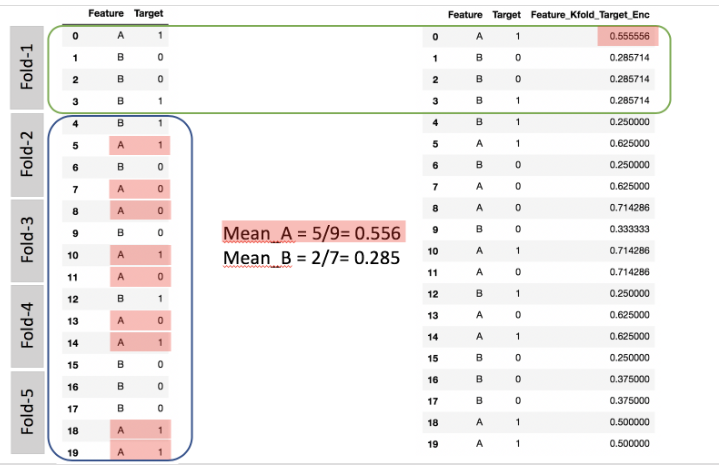

In [ ]:
X['target'] = y

cols = X.drop(['target','id'], axis = 1).columns

In [ ]:
%%time

X_fold=X.copy()
X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})
kf = KFold(n_splits = 5, shuffle = False)

for train_ind,val_ind in kf.split(X):
    for col in cols:
      if(X_fold[col].dtype == 'object'):
        replaced = dict(X.iloc[train_ind][[col, 'target']].groupby(col)['target'].mean())
        X_fold.loc[val_ind, col] = X_fold.iloc[val_ind][col].replace(replaced).values

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



CPU times: user 3min 5s, sys: 5min 20s, total: 8min 26s
Wall time: 8min 27s


In [ ]:
X_fold.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,0.327356,0.360281,0.305929,0.24171,0.237044,0.350506,0.320388,0.225806,0.38009,0.5,0.334926,0.403542,0.259103,0.307031,0.211418,0.412888,0.323473,0.244538,0
1,1,0,1,0,1,1,0.327356,0.290501,0.358107,0.289501,0.304566,0.386047,0.263158,0.300429,0.195402,0.125,0.278366,0.403542,0.327796,0.208194,0.185704,0.293144,0.341711,0.327219,0
2,2,0,0,0,0,1,0.242135,0.290501,0.293881,0.289501,0.355844,0.275828,0.300529,0.193384,0.224771,0.166667,0.278366,0.316665,0.402135,0.307031,0.354919,0.208748,0.341711,0.244538,0
3,3,0,1,0,0,1,0.350536,0.290501,0.305929,0.340791,0.328661,0.22403,0.354102,0.349432,0.269006,0.233333,0.278366,0.403542,0.361036,0.330519,0.211418,0.358066,0.323473,0.255791,1
4,4,0,0,0,0,0,0.350536,0.290501,0.293881,0.340791,0.328661,0.310154,0.307527,0.288571,0.36478,0.137931,0.278366,0.403542,0.225265,0.208194,0.354919,0.410066,0.341711,0.327219,0


In [ ]:
X_fold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      300000 non-null  int64 
 1   bin_0   300000 non-null  int64 
 2   bin_1   300000 non-null  int64 
 3   bin_2   300000 non-null  int64 
 4   bin_3   300000 non-null  int64 
 5   bin_4   300000 non-null  int64 
 6   nom_0   300000 non-null  object
 7   nom_1   300000 non-null  object
 8   nom_2   300000 non-null  object
 9   nom_3   300000 non-null  object
 10  nom_4   300000 non-null  object
 11  nom_5   300000 non-null  object
 12  nom_6   300000 non-null  object
 13  nom_7   300000 non-null  object
 14  nom_8   300000 non-null  object
 15  nom_9   300000 non-null  object
 16  ord_0   300000 non-null  object
 17  ord_1   300000 non-null  object
 18  ord_2   300000 non-null  object
 19  ord_3   300000 non-null  object
 20  ord_4   300000 non-null  object
 21  ord_5   300000 non-null  object
 

#Summary

We can see the summary of our model performance against each encoding technique we have used. It is clear that OHE together with cyclic feature encoding yielded maximum accuracy.

Encoding|Score|Wall Time
:---:|:---:|:---:
Label Encoding|0.692|1.16 s
OneHotEncoder|0.757|1.78 s
Feature Hashing|0.752|4.84 s
Dataset statistic|0.695|723 ms
Cyclic + OHE|0.758|300ms
Target encoding|0.694|3min 33 s